In [1]:
# 手写数字分类
import pandas as pd
from sklearn import tree,metrics,neighbors,naive_bayes,svm,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 加载、探索数据

In [3]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [5]:
data = digits.data
data.shape

(1797, 64)

In [7]:
# 第一幅图像，手写字体,上面data中的64列，就是8*8的像素值的列表
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


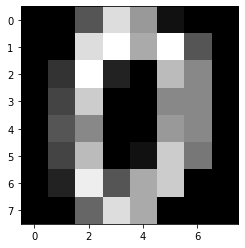

In [10]:
plt.gray()
plt.imshow(digits.images[0])

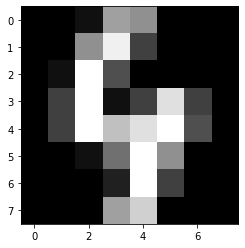

In [12]:
plt.imshow(digits.images[111])

### 数据分割、模型构建

In [13]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [15]:
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()


In [16]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [18]:
# KNN分类器 n = 5,这里的五个是取距离最近的五个数据，
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_ss,y_train)
y_knn5_pred = knn5.predict(X_test_ss)
print(metrics.classification_report(y_test,y_knn5_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      1.00      0.99        55
           2       0.98      0.98      0.98        52
           3       0.95      0.98      0.96        56
           4       0.98      0.98      0.98        64
           5       0.97      0.97      0.97        73
           6       0.97      1.00      0.98        57
           7       0.98      0.97      0.98        62
           8       0.98      0.98      0.98        52
           9       0.97      0.91      0.94        68

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



In [31]:
# KNN分类器 n = 5,这里的五个是取距离最近的五个数据，
knn50 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn50.fit(X_train,y_train)
y_knn50_pred = knn50.predict(X_test)
print(metrics.classification_report(y_test,y_knn50_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        52
           3       0.98      1.00      0.99        56
           4       0.98      1.00      0.99        64
           5       0.99      0.99      0.99        73
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        62
           8       1.00      1.00      1.00        52
           9       0.98      0.96      0.97        68

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



In [20]:
# KNN分类器 n = 10
knn10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train_ss,y_train)
y_knn10_pred = knn10.predict(X_test_ss)
print(metrics.classification_report(y_test,y_knn10_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.95      1.00      0.97        55
           2       0.98      1.00      0.99        52
           3       0.98      0.95      0.96        56
           4       0.97      0.98      0.98        64
           5       0.97      0.96      0.97        73
           6       0.97      0.98      0.97        57
           7       0.97      0.97      0.97        62
           8       0.98      0.94      0.96        52
           9       0.97      0.94      0.96        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



In [32]:
# KNN分类器 n = 200
knn200 = neighbors.KNeighborsClassifier(n_neighbors=200)
knn200.fit(X_train_ss,y_train)
y_knn200_pred = knn200.predict(X_test_ss)
print(metrics.classification_report(y_test,y_knn200_pred))
# 随着n的增加，效果变差，

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        55
           1       0.73      0.73      0.73        55
           2       0.84      0.83      0.83        52
           3       0.70      0.88      0.78        56
           4       0.98      0.83      0.90        64
           5       0.98      0.67      0.80        73
           6       0.90      0.96      0.93        57
           7       0.90      1.00      0.95        62
           8       0.80      0.77      0.78        52
           9       0.68      0.63      0.66        68

    accuracy                           0.82       594
   macro avg       0.83      0.83      0.82       594
weighted avg       0.83      0.82      0.82       594



In [23]:
# 创建SVM分类器
mlsvm = svm.SVC()
mlsvm.fit(X_train_ss,y_train)
y_mlsvm_pred = mlsvm.predict(X_test_ss)
print(metrics.classification_report(y_test,y_mlsvm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        55
           2       0.95      1.00      0.97        52
           3       0.96      0.95      0.95        56
           4       0.98      1.00      0.99        64
           5       0.97      0.99      0.98        73
           6       0.98      1.00      0.99        57
           7       1.00      0.98      0.99        62
           8       0.98      0.96      0.97        52
           9       0.98      0.94      0.96        68

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
# 采用Min-Max规范化
mm = preprocessing.MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [26]:
# 创建Naive Bayes分类器
mnb = naive_bayes.MultinomialNB()
mnb.fit(X_train_mm,y_train)
y_mnb_pred = mnb.predict(X_test_mm)
print(metrics.classification_report(y_test,y_mnb_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.88      0.67      0.76        55
           2       0.86      0.92      0.89        52
           3       0.96      0.86      0.91        56
           4       0.95      0.97      0.96        64
           5       1.00      0.73      0.84        73
           6       0.97      0.98      0.97        57
           7       0.91      1.00      0.95        62
           8       0.77      0.94      0.84        52
           9       0.70      0.85      0.77        68

    accuracy                           0.89       594
   macro avg       0.90      0.89      0.89       594
weighted avg       0.90      0.89      0.89       594



In [27]:
# 创建CART决策树分类器
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train_mm,y_train)
y_dtc_pred = dtc.predict(X_test_mm)
print(metrics.classification_report(y_test,y_dtc_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.82      0.76      0.79        55
           2       0.79      0.79      0.79        52
           3       0.80      0.77      0.78        56
           4       0.82      0.88      0.85        64
           5       0.91      0.82      0.86        73
           6       0.85      0.96      0.90        57
           7       0.90      0.89      0.89        62
           8       0.83      0.83      0.83        52
           9       0.78      0.82      0.80        68

    accuracy                           0.85       594
   macro avg       0.85      0.85      0.85       594
weighted avg       0.85      0.85      0.85       594



In [29]:
dtc0 = tree.DecisionTreeClassifier()
dtc0.fit(X_train,y_train)
y_dtc0_pred = dtc0.predict(X_test)
print(metrics.classification_report(y_test,y_dtc0_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.73      0.73      0.73        55
           2       0.88      0.81      0.84        52
           3       0.83      0.80      0.82        56
           4       0.71      0.80      0.75        64
           5       0.89      0.85      0.87        73
           6       0.89      0.98      0.93        57
           7       0.87      0.89      0.88        62
           8       0.78      0.77      0.78        52
           9       0.83      0.79      0.81        68

    accuracy                           0.84       594
   macro avg       0.84      0.84      0.84       594
weighted avg       0.84      0.84      0.84       594



In [30]:
dtc1 = tree.DecisionTreeClassifier()
dtc1.fit(X_train_ss,y_train)
y_dtc1_pred = dtc1.predict(X_test_ss)
print(metrics.classification_report(y_test,y_dtc1_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.78      0.76      0.77        55
           2       0.87      0.90      0.89        52
           3       0.83      0.80      0.82        56
           4       0.81      0.81      0.81        64
           5       0.92      0.89      0.90        73
           6       0.88      0.98      0.93        57
           7       0.95      0.89      0.92        62
           8       0.82      0.81      0.82        52
           9       0.83      0.87      0.85        68

    accuracy                           0.87       594
   macro avg       0.87      0.87      0.87       594
weighted avg       0.87      0.87      0.87       594



In [ ]:
# 可以看出knn和svm效果比较好，朴素贝叶斯和决策树次之；对特征的标准化，对决策树影响不大